# Importing the dependency

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# loading the data

In [3]:
df = pd.read_csv('Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median() , inplace =True)

In [7]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'] , errors = 'coerce')
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median() , inplace =True)

In [8]:
df.drop(columns = ['customerID'], inplace = True)

In [16]:
df.replace({'gender':{'Male':1 , 'Female' : 0}} , inplace = True)

In [18]:
# Assuming your DataFrame is named df
df['OnlineSecurity'] = pd.factorize(df['OnlineSecurity'])[0]
df['OnlineBackup'] = pd.factorize(df['OnlineBackup'])[0]
df['DeviceProtection'] = pd.factorize(df['DeviceProtection'])[0]
df['MultipleLines'] = pd.factorize(df['MultipleLines'])[0]
df['TechSupport'] = pd.factorize(df['TechSupport'])[0]
df['StreamingTV'] = pd.factorize(df['StreamingTV'])[0]
df['StreamingMovies'] = pd.factorize(df['StreamingMovies'])[0]



# Encoding the categorical variable

In [21]:
binary_cols = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']


In [23]:
le = LabelEncoder()

In [25]:
for col in binary_cols :
    for col in binary_cols:
        df[col] = le.fit_transform(df[col])

# one-hot Encoding for non binary categorical data

In [28]:
df = pd.get_dummies(df,columns = ['Contract','PaymentMethod','InternetService'],drop_first = True)

# Feature scaling

In [31]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Handeling the class imbalance 

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [35]:
# spliting the feature and target

In [38]:
x= df.drop(columns =['Churn'])
y= df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 42 ,stratify = y)

In [40]:
# Print class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

Class distribution before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64


In [42]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [44]:
# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [48]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.277445,0,0,0,0,0,...,1,-1.160323,-0.994242,False,False,False,True,False,False,False
1,1,0,0,0,0.066327,1,1,1,1,1,...,0,-0.259629,-0.173244,True,False,False,False,True,False,False
2,1,0,0,0,-1.236724,1,1,1,0,0,...,1,-0.362660,-0.959674,False,False,False,False,True,False,False
3,1,0,0,0,0.514251,0,0,1,1,1,...,0,-0.746535,-0.194766,True,False,False,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0,1,0,...,1,0.197365,-0.940470,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,1,1,1,...,1,0.665992,-0.128655,True,False,False,False,True,False,False
7039,0,0,1,1,1.613701,1,2,0,0,1,...,1,1.277533,2.243151,True,False,True,False,False,True,False
7040,0,0,1,1,-0.870241,0,0,1,1,0,...,1,-1.168632,-0.854469,False,False,False,True,False,False,False
7041,1,1,1,0,-1.155283,1,2,0,1,0,...,1,0.320338,-0.872062,False,False,False,False,True,True,False


In [50]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [52]:
x_train.to_csv('x_train_processed.csv', index=False)
x_test.to_csv('x_test_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.277445,0,0,0,0,0,...,-1.160323,-0.994242,0,False,False,False,True,False,False,False
1,1,0,0,0,0.066327,1,1,1,1,1,...,-0.259629,-0.173244,0,True,False,False,False,True,False,False
2,1,0,0,0,-1.236724,1,1,1,0,0,...,-0.362660,-0.959674,1,False,False,False,False,True,False,False
3,1,0,0,0,0.514251,0,0,1,1,1,...,-0.746535,-0.194766,0,True,False,False,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0,1,0,...,0.197365,-0.940470,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,1,1,1,...,0.665992,-0.128655,0,True,False,False,False,True,False,False
7039,0,0,1,1,1.613701,1,2,0,0,1,...,1.277533,2.243151,0,True,False,True,False,False,True,False
7040,0,0,1,1,-0.870241,0,0,1,1,0,...,-1.168632,-0.854469,0,False,False,False,True,False,False,False
7041,1,1,1,0,-1.155283,1,2,0,1,0,...,0.320338,-0.872062,1,False,False,False,False,True,True,False


# EDA

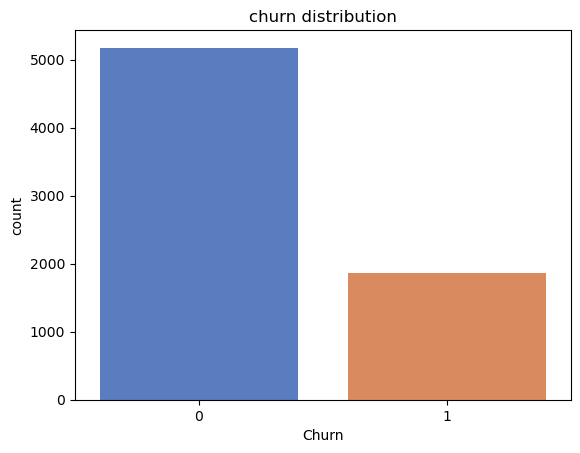

In [57]:
sns.countplot(x = 'Churn' , data = df,palette = 'muted')
plt.title('churn distribution' )
plt.show()

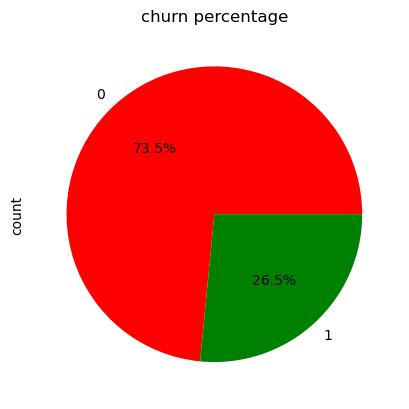

In [58]:
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors =['red','green'])
plt.title('churn percentage')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

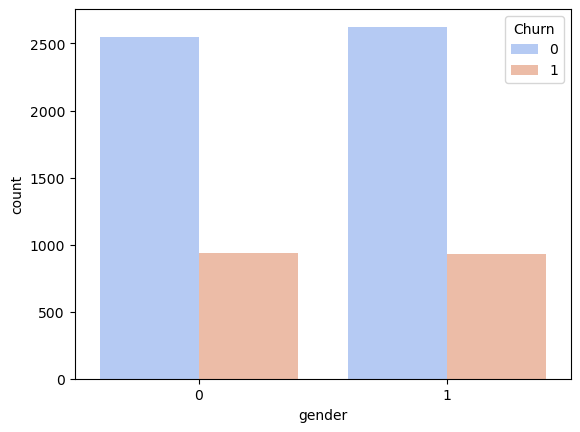

In [61]:
sns.countplot(x = 'gender' , hue = 'Churn', data = df,palette = 'coolwarm')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

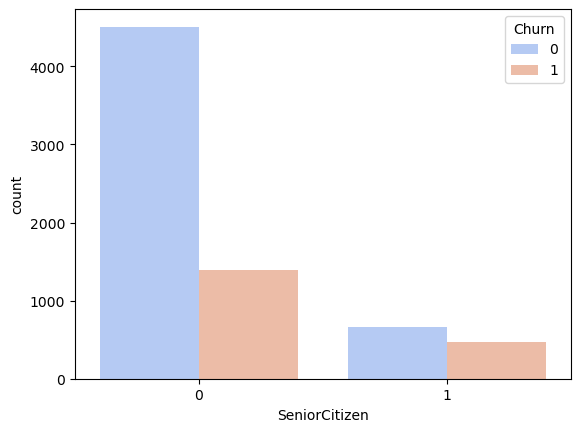

In [63]:
sns.countplot(x = 'SeniorCitizen' , hue = 'Churn', data = df,palette = 'coolwarm')

<Axes: xlabel='Partner', ylabel='count'>

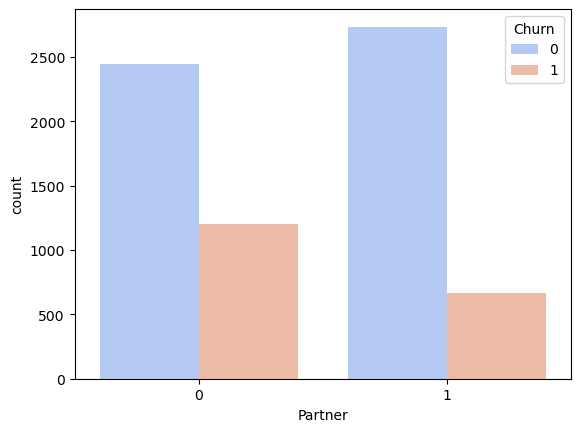

In [65]:
sns.countplot(x = 'Partner' , hue = 'Churn', data = df,palette = 'coolwarm')

<Axes: xlabel='Churn', ylabel='tenure'>

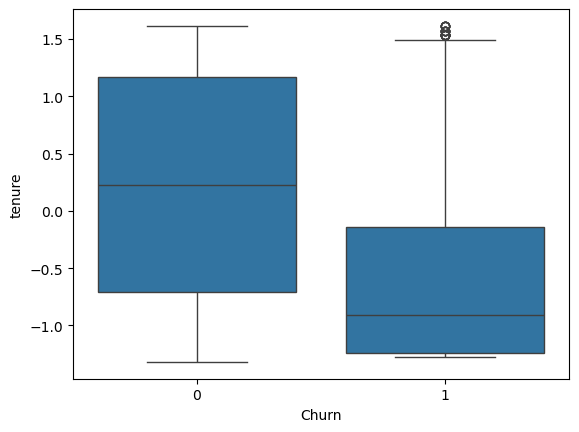

In [67]:
sns.boxplot(x = 'Churn' , y = 'tenure' , data = df)

<Axes: xlabel='Contract_One year', ylabel='count'>

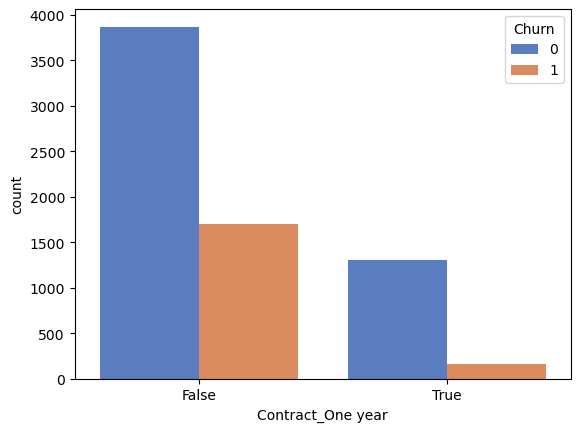

In [69]:
sns.countplot(x= 'Contract_One year' , hue = 'Churn' , data = df , palette = 'muted')

<Axes: xlabel='Contract_Two year', ylabel='count'>

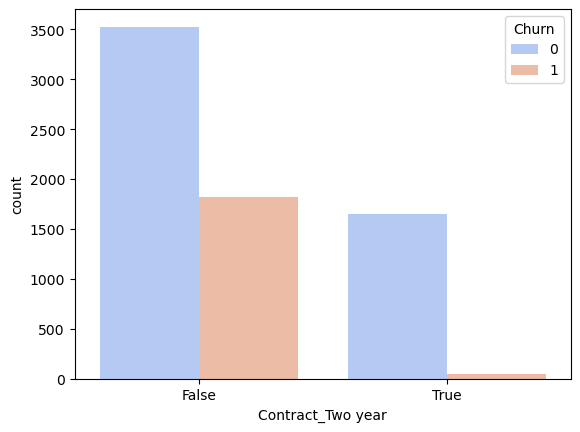

In [71]:
sns.countplot(x= 'Contract_Two year' , hue = 'Churn' , data = df , palette = 'coolwarm')

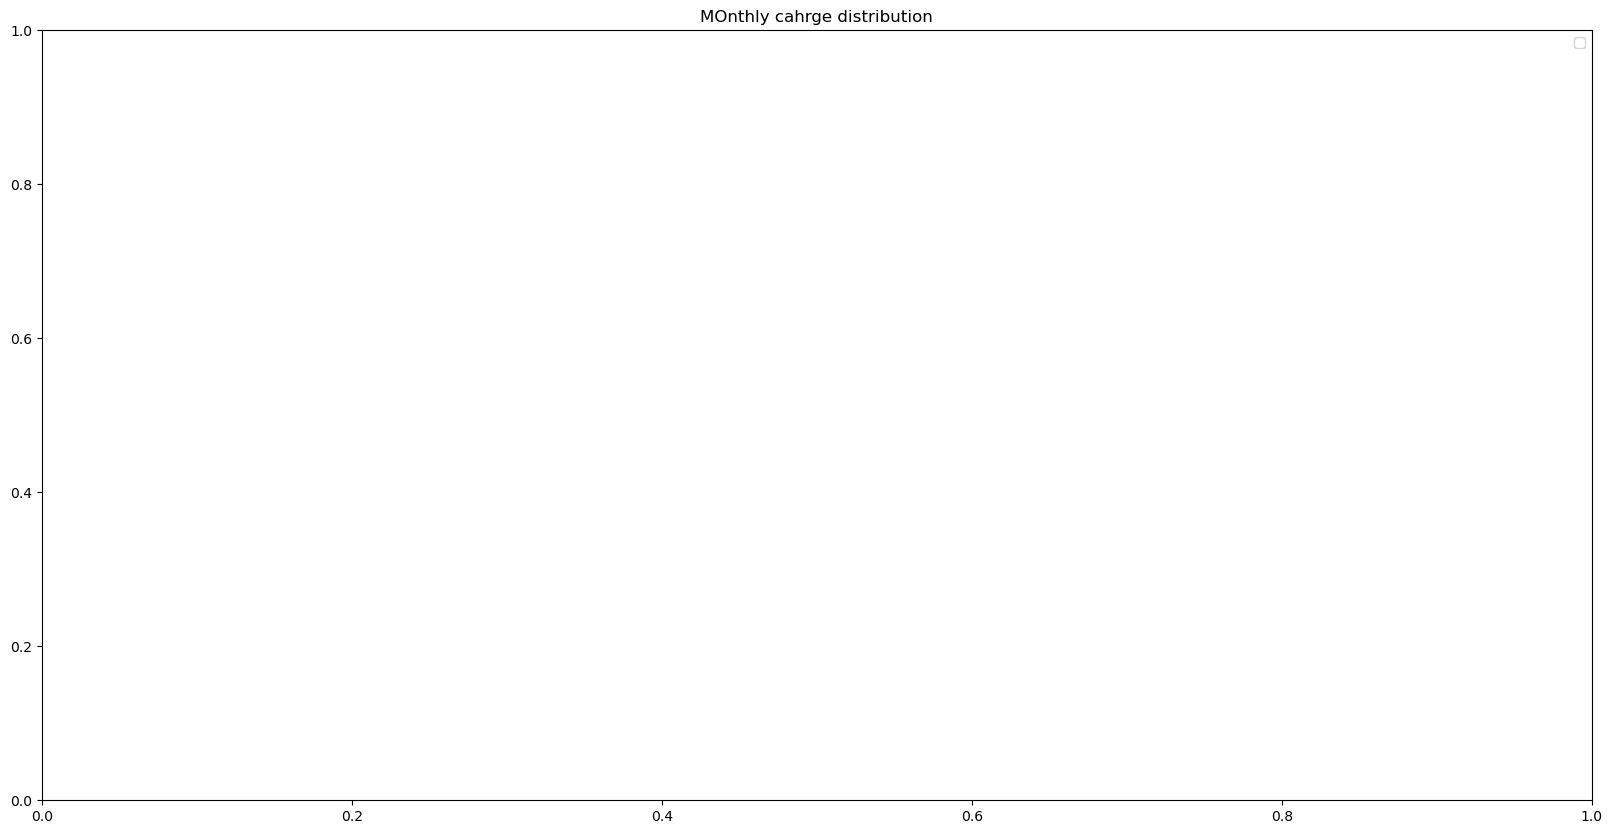

In [73]:
plt.figure(figsize = (20,10))
sns.histplot(df[df['Churn']== 'Yes']['MonthlyCharges'] , bins=30 , kde = True , color = 'lightgreen' , label= 'Churned')
sns.histplot(df[df['Churn']== 'No']['MonthlyCharges'] , bins=30 , kde = True , color = 'red' , label= 'Retained')

plt.title('MOnthly cahrge distribution')
plt.legend('Churn')
plt.show()

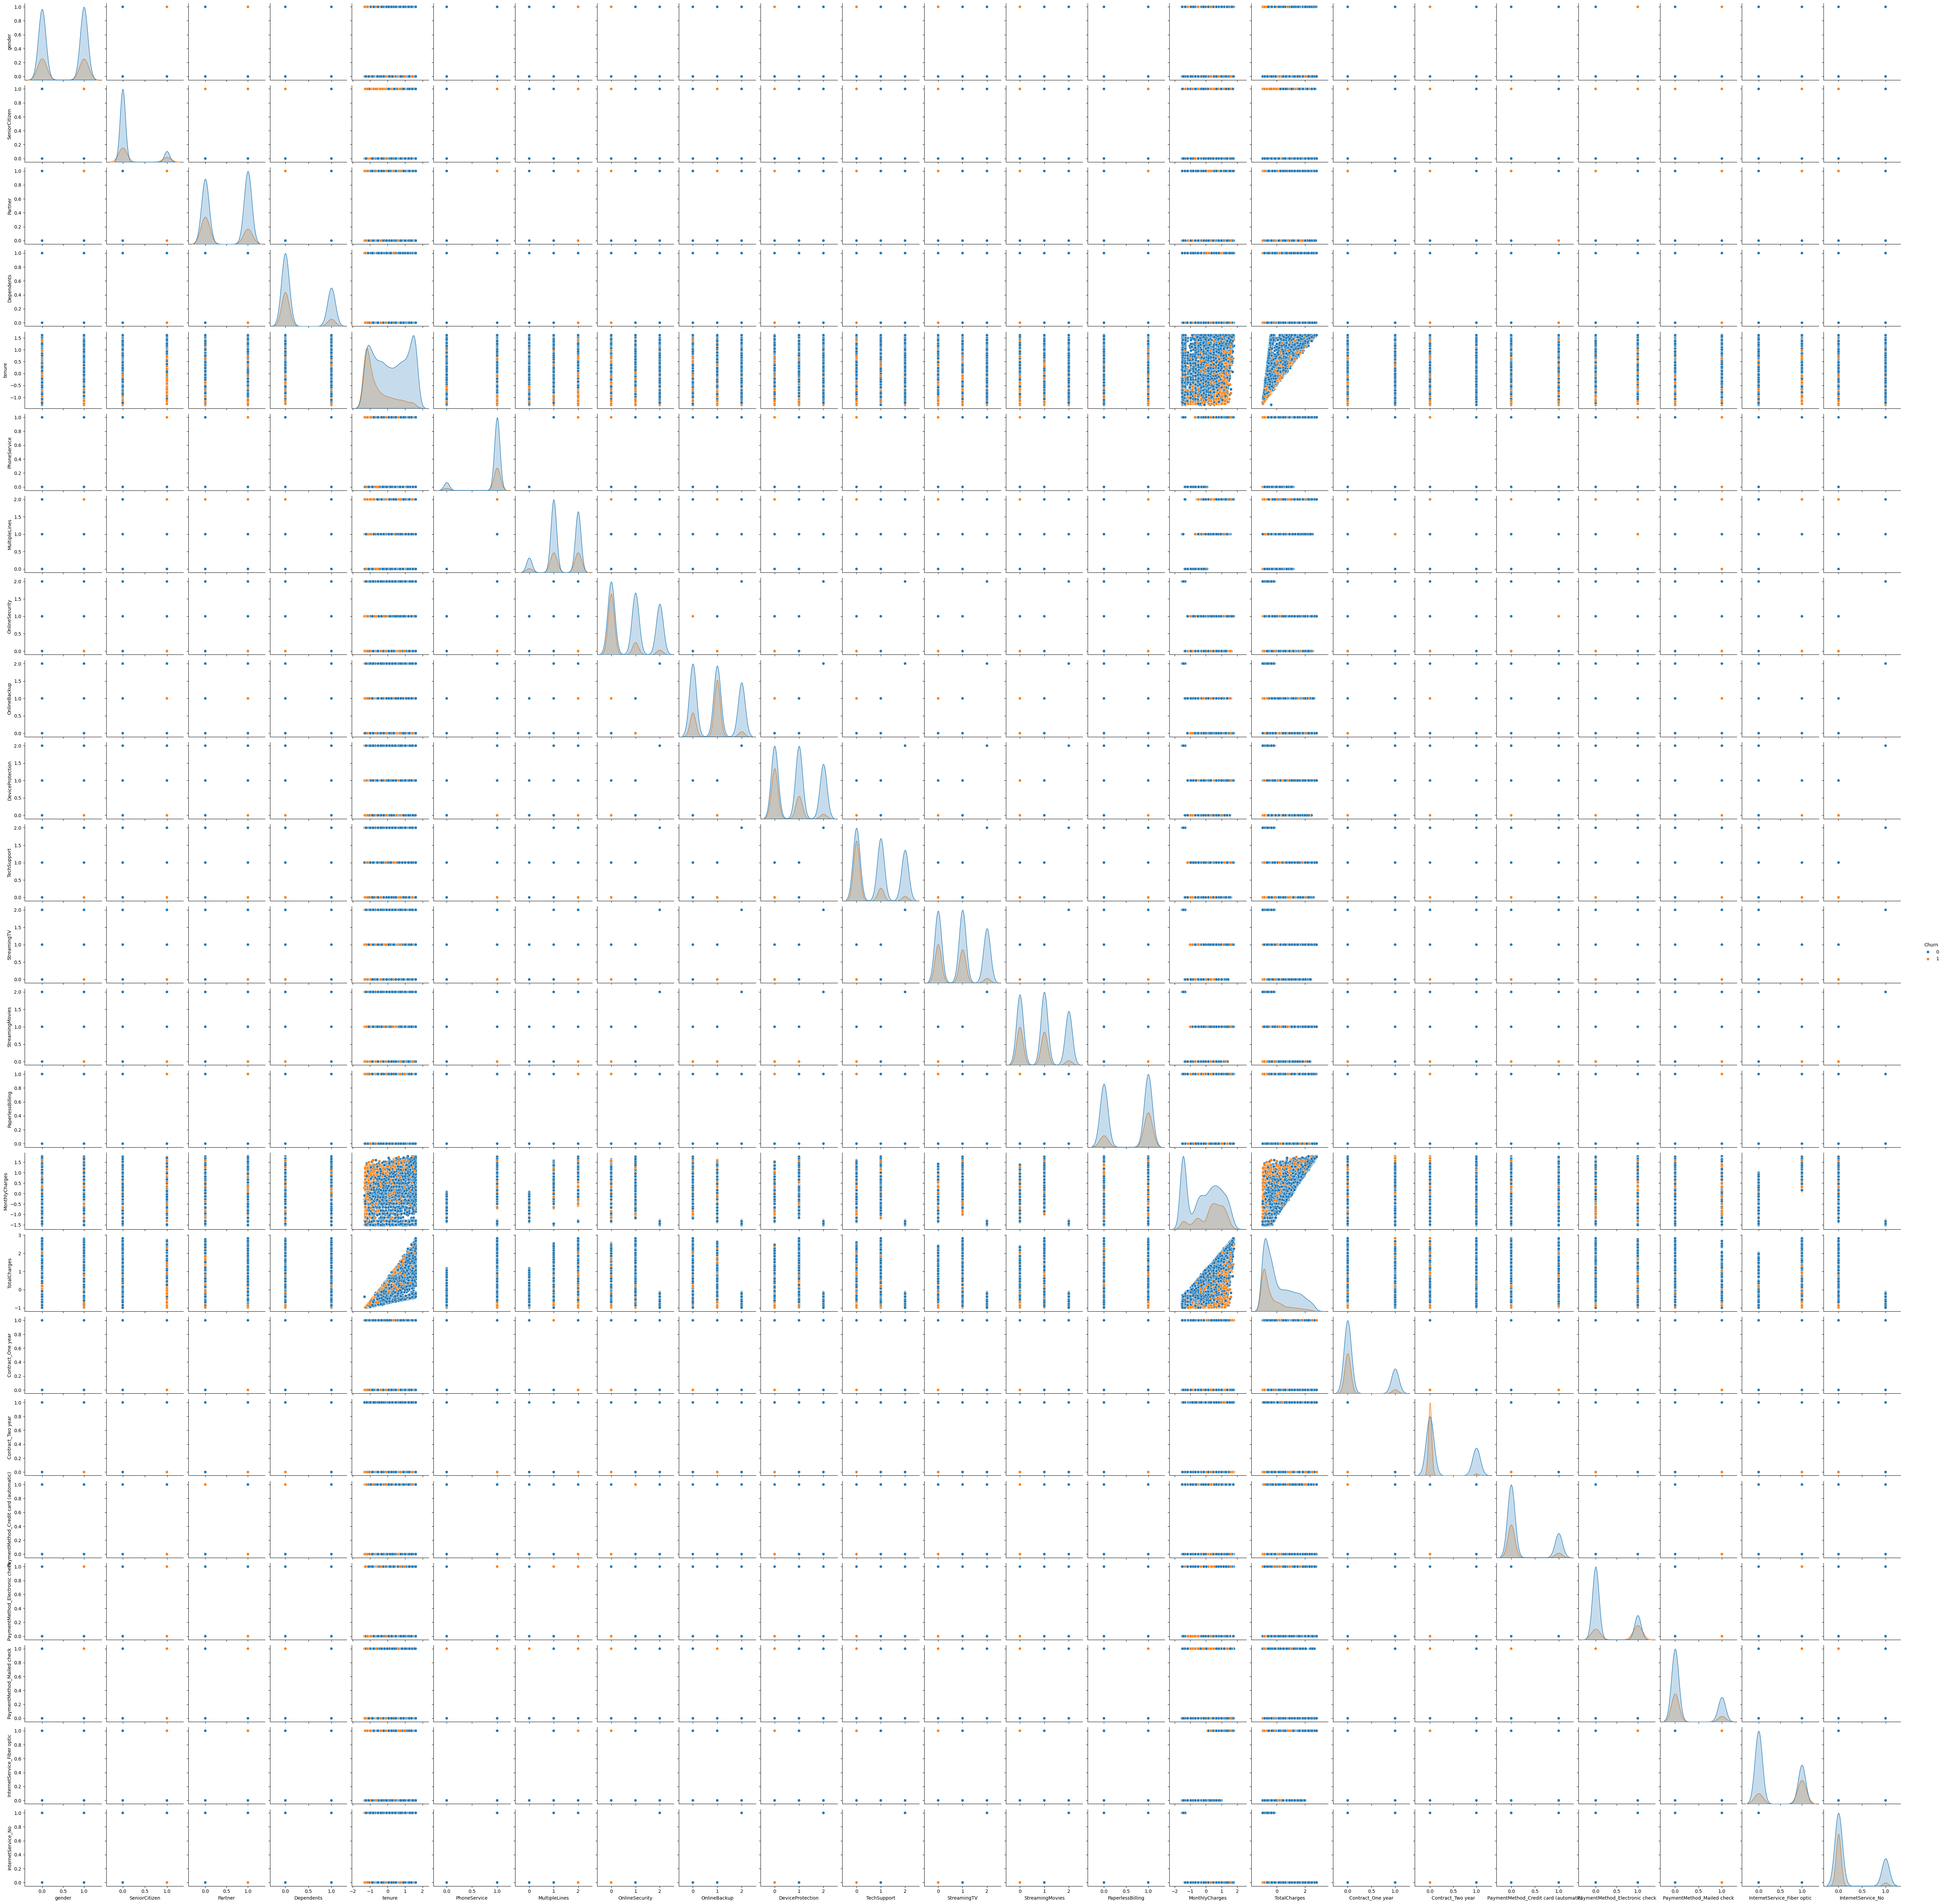

In [79]:
sns.pairplot(df , hue = 'Churn' , diag_kind = 'kde')

# Model Traing and Model Evaluation

In [123]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.1)

# Train the model
model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Accuracy: 0.759403832505323
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

MAE: 0.24059616749467708
MSE: 0.24059616749467708
RMSE: 0.49050603206757515
R² Score: -0.23606726220667218


Accuracy: 0.872249822569198
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1036
           1       0.72      0.85      0.78       373

    accuracy                           0.87      1409
   macro avg       0.83      0.86      0.84      1409
weighted avg       0.88      0.87      0.88      1409



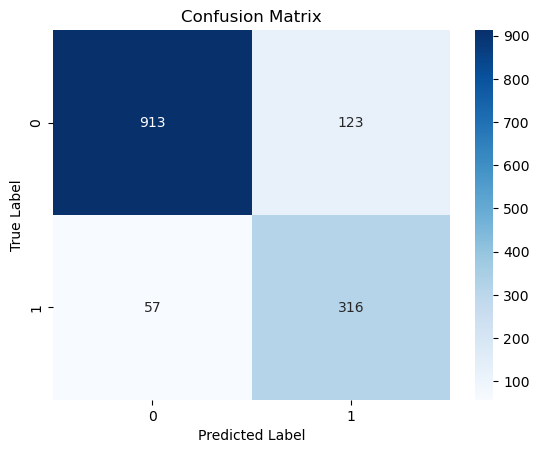

MAE: 0.127750177430802
MSE: 0.127750177430802
RMSE: 0.3574215682227389
R² Score: 0.34368109971327143
Accuracy: 0.872249822569198


In [127]:
# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print("Accuracy:", accuracy_score(y_test, y_pred))

In [87]:
model = XGBRegressor()

In [89]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define XGBRegressor Model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define Hyperparameter Grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='r2', 
    cv=5, 
    verbose=2, 
    n_jobs=-1
)

# Train the Model
grid_search.fit(x_train, y_train)

# Best Parameters & Best Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make Predictions
y_pred = best_model.predict(x_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
MAE: 0.26730007930520405
MSE: 0.12777184903886968
RMSE: 0.3574518835296153
R² Score: 0.34356976142583817
